In [12]:
#!tar -vxjf ./my_filename.tar.bz2

In [13]:
#!pip install python-igraph

In [1]:
from igraph import *
from tqdm import tqdm_notebook as tqdm

In [3]:
# Read the directed graph (output of preprocess.py)
g = Graph.Read_Ncol("./graphFile", directed=True)
print("Number of nodes: ", g.vcount())
print("Number of directed edges: ", g.ecount())
g = g.simplify()
print("[Simplify] Number of nodes: ", g.vcount())
print("[Simplify] Number of directed edges: ", g.ecount())
g.es["weight"] = 0.0
g.save("graph.gml", format="gml")

Number of nodes:  595460
Number of directed edges:  14273311
[Simplify] Number of nodes:  595460
[Simplify] Number of directed edges:  14273311


In [4]:
# Read actions performed by each user
print("Loading usersCounts...")
f_nodes = open("learn_v4_step1/usersCounts.txt", "r")
user_action = {}
for line in f_nodes:
    v, a_v = [int(x) for x in line.split()]
    user_action[v] = a_v
f_nodes.close()

Loading usersCounts...


In [5]:
# Read edges, and replace the weights in g by influence probabilities
print("Loading edgesCounts...")
f_edges = open("learn_v4_step1/edgesCounts.txt", "r")
for line in f_edges:
    line = line.split()
    u, v, a_u2v, a_v2u = [int(x) for x in line[0:4]]
    if u in user_action.keys() and v in user_action.keys():
        # u -> v
        uid = g.vs.find(str(u))
        vid = g.vs.find(str(v))
        eid_uv = g.get_eid(uid, vid, error=False)
        if eid_uv >=0 and user_action[u] > 0:
            g.es[eid_uv]["weight"] = round(float(a_u2v) / user_action[u], 6)
        # v -> u
        eid_vu = g.get_eid(vid, uid, error=False)
        if eid_vu >= 0 and user_action[v] > 0:
            g.es[eid_vu]["weight"] = round(float(a_v2u) / user_action[v], 6)
f_edges.close()

Loading edgesCounts...


In [6]:
# Delete edges with zero influence probabilities
g.delete_edges(g.es.select(weight_le=0))
print("Number of edges after deletion: ", g.ecount())

Number of edges after deletion:  4690576


In [7]:
lwcc = g.clusters(mode='weak').giant()
lwcc.vs["name"] = range(lwcc.vcount())
print("Largest weakly connected component")
print("Number of nodes: ", lwcc.vcount(), float(lwcc.vcount()) / g.vcount())
print("Number of directed edges: ", lwcc.ecount())

Largest weakly connected component
Number of nodes:  378015 0.6348285359218083
Number of directed edges:  4686211


In [10]:
# Output to files
with open("learn_v4_step1/attribute.txt", "w") as f_attr:
    f_attr.write("n=%d" % lwcc.vcount())
    f_attr.write("m=%d" % lwcc.ecount())

lwcc.write_ncol("learn_v4_step1/graph_ic.inf")
with open("learn_v4_step1/graph_ic_nm.inf", "w") as f_graph_nm:
    f_graph_nm.write("%d %d\n" % (lwcc.vcount(), lwcc.ecount()))
    with open("learn_v4_step1/graph_ic.inf", "r") as f_tmp:
        f_graph_nm.write(f_tmp.read())

In [14]:
! head learn_v4_step1/graph_ic.inf

0 2 1.285714
0 5 0.714286
0 6 0.142857
0 9 0.428571
0 10 0.285714
0 16 0.142857
0 18 0.142857
0 19 0.285714
0 20 0.428571
0 22 0.142857


In [46]:
weights=[i['weight'] for i in tqdm(lwcc.es)]

HBox(children=(IntProgress(value=0, max=4686211), HTML(value='')))

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([  2.36645000e+05,   5.11081000e+05,   4.92599000e+05,
          4.34691000e+05,   3.37998000e+05,   2.69767000e+05,
          2.57807000e+05,   2.02362000e+05,   1.84716000e+05,
          1.49049000e+05,   1.01485000e+05,   1.40501000e+05,
          8.64010000e+04,   1.13887000e+05,   7.83570000e+04,
          5.32670000e+04,   1.04423000e+05,   3.69270000e+04,
          3.66100000e+04,   5.07650000e+04,   4.42590000e+04,
          1.88030000e+04,   8.62150000e+04,   2.22180000e+04,
          2.07080000e+04,   3.34870000e+04,   3.56530000e+04,
          1.65540000e+04,   2.40890000e+04,   1.68510000e+04,
          1.67560000e+04,   1.20630000e+04,   5.26200000e+03,
          6.91890000e+04,   5.99000000e+03,   1.06760000e+04,
          8.20100000e+03,   1.08210000e+04,   1.49860000e+04,
          3.98800000e+03,   1.68120000e+04,   1.03150000e+04,
          6.97100000e+03,   4.07300000e+03,   2.35530000e+04,
          4.08100000e+03,   6.12600000e+03,   7.69700000e+03,
        

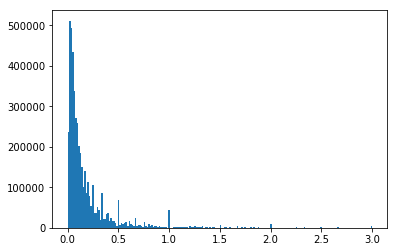

In [43]:
plt.hist(weights, bins=200, range=[0,3])

In [45]:
min(weights)

0.000183

### Experimenting with obtained network

###### Page rank

In [48]:
pr=lwcc.pagerank()

(array([  3.65580000e+05,   7.56000000e+03,   2.36200000e+03,
          9.64000000e+02,   4.83000000e+02,   3.01000000e+02,
          1.89000000e+02,   1.02000000e+02,   1.01000000e+02,
          7.80000000e+01,   5.60000000e+01,   3.90000000e+01,
          2.80000000e+01,   2.90000000e+01,   2.10000000e+01,
          1.80000000e+01,   7.00000000e+00,   1.50000000e+01,
          1.40000000e+01,   8.00000000e+00,   6.00000000e+00,
          2.00000000e+00,   5.00000000e+00,   8.00000000e+00,
          4.00000000e+00,   6.00000000e+00,   2.00000000e+00,
          4.00000000e+00,   6.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

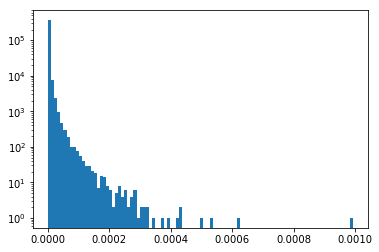

In [53]:
plt.hist(pr, bins=100, range=[min(pr),max(pr)],log=True)

##### Degree - unweighted

In [61]:
deg=lwcc.degree()

(array([  2.17425000e+05,   6.05780000e+04,   3.31630000e+04,
          1.99190000e+04,   1.30920000e+04,   8.80200000e+03,
          5.97300000e+03,   4.27600000e+03,   3.11200000e+03,
          2.37500000e+03,   1.74900000e+03,   1.38800000e+03,
          1.02100000e+03,   8.49000000e+02,   6.47000000e+02,
          5.32000000e+02,   4.71000000e+02,   3.81000000e+02,
          2.92000000e+02,   2.63000000e+02,   1.98000000e+02,
          1.81000000e+02,   1.37000000e+02,   1.44000000e+02,
          1.06000000e+02,   9.30000000e+01,   9.40000000e+01,
          8.30000000e+01,   7.70000000e+01,   6.90000000e+01,
          4.00000000e+01,   5.00000000e+01,   4.10000000e+01,
          3.40000000e+01,   3.00000000e+01,   3.30000000e+01,
          2.50000000e+01,   1.50000000e+01,   2.40000000e+01,
          2.90000000e+01,   1.60000000e+01,   1.90000000e+01,
          1.30000000e+01,   1.50000000e+01,   6.00000000e+00,
          1.40000000e+01,   1.70000000e+01,   1.10000000e+01,
        

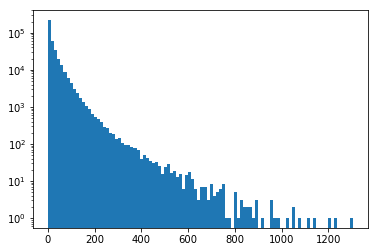

In [62]:
plt.hist(deg, bins=100, range=[min(deg),max(deg)],log=True)

In [67]:
g.es["weight"]

[1.285714,
 0.714286,
 0.142857,
 0.428571,
 0.285714,
 0.142857,
 0.142857,
 0.285714,
 0.428571,
 0.142857,
 1.285714,
 0.142857,
 0.142857,
 0.142857,
 0.142857,
 0.428571,
 0.285714,
 0.142857,
 3.714286,
 0.142857,
 0.428571,
 0.142857,
 0.019231,
 0.019231,
 0.019231,
 0.019231,
 0.019231,
 0.019231,
 0.019231,
 0.019231,
 0.019231,
 0.019231,
 0.038462,
 0.019231,
 0.125,
 0.875,
 0.125,
 0.016949,
 0.016949,
 0.101695,
 0.084746,
 0.135593,
 0.016949,
 0.135593,
 0.050847,
 0.152542,
 0.237288,
 0.016949,
 0.033898,
 0.067797,
 0.033898,
 0.033898,
 0.084746,
 0.491525,
 0.016949,
 0.050847,
 0.050847,
 0.033898,
 0.016949,
 0.305085,
 0.016949,
 0.016949,
 0.016949,
 0.033898,
 0.25,
 0.1,
 0.125,
 0.15,
 0.575,
 0.075,
 0.125,
 0.075,
 0.275,
 1.15,
 0.15,
 0.075,
 0.025,
 0.05,
 0.1,
 0.25,
 0.025,
 0.05,
 0.025,
 0.025,
 0.025,
 0.05,
 0.05,
 0.375,
 0.05,
 0.25,
 0.025,
 0.175,
 0.05,
 0.25,
 0.025,
 0.025,
 0.076923,
 0.076923,
 0.076923,
 0.076923,
 0.076923,
 0.076923,


# Kod Macieja

In [1]:
import pandas as pd

df_follower=pd.read_table("/nfs/twitter/Prediction_of_Viral_Memes_on_Twitter/follower_gcc.anony.dat",header=None,delim_whitespace=True)
df_follower.columns=['user1','user2']

In [2]:
from tqdm import tqdm_notebook as tqdm
import codecs

dfs = []
with open('/nfs/twitter/Prediction_of_Viral_Memes_on_Twitter/timeline_tag.anony.dat', 'rb') as f:
    reader = codecs.getreader("utf-8")
    contents = reader(f)
    for line in tqdm(contents):
        split=line.split(" ")
        length=len(split)
        for i in range(1,length-1):
            split2=split[i].split(",")
            dfs.append([split[0],split2[0],split2[1]])
        split2=split[length-1].split(",")
        dfs.append([split[0],split2[0],split2[1][:-1]])
df_tag=pd.DataFrame(dfs)
del dfs
del split
del split2
del length
df_tag.columns=['tag','ts','user']
from collections import defaultdict
d = defaultdict(lambda: len(d))
df_tag['tagID'] = df_tag.apply(lambda row: d[row['tag']], axis=1)
df_tag['ts']=df_tag['ts'].astype(int)
df_tag.sort_values(by=['ts'], axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

In [3]:
df_tag_unique=df_tag.drop_duplicates(subset=['tagID', 'user'], keep='first', inplace=False)[['tagID', 'user','ts']]

In [43]:
#matrix = [[0] * (df_follower['user2'].max()+1) for i in range(df_follower['user2'].max()+1)]
#for index, row in tqdm(df_follower.iterrows()):
#    matrix[row['user1']][row['user2']]=1
del matrix

NameError: name 'matrix' is not defined

In [ ]:
dict_A_u=defaultdict(lambda: 0)
del dict_A_u
dict_A_u=defaultdict(lambda: 0)
dict_A_v2u=defaultdict(lambda: 0)
del dict_A_v2u
dict_A_v2u=defaultdict(lambda: 0)
dict_A_viu=defaultdict(lambda: 0)
del dict_A_viu
dict_A_viu=defaultdict(lambda: 0)
for i in tqdm(range(len(d))):
    current_table=[]
    for index, row in tqdm(df_tag_unique[df_tag_unique['tagID']==i].iterrows()):
        #print(row['user'])
        dict_A_u[row['user']]=dict_A_u[row['user']]+1
        parents=[]
        for event in current_table:
            #print(type(event[0]))
            if df_follower[((df_follower['user1']==int(row['user'])) & (df_follower['user2']==event[0])) | ((df_follower['user1']==event[0]) & (df_follower['user2']==int(row['user'])))].shape[0]>0:
                if row['ts']>event[2]:
                    dict_A_v2u[(event[0],int(row['user']))]=dict_A_v2u[(event[0],int(row['user']))]+1
                dict_A_viu[(event[0],int(row['user']))]=dict_A_viu[(event[0],int(row['user']))]+1
                dict_A_viu[(int(row['user']),event[0])]=dict_A_viu[(int(row['user']),event[0])]+1
        current_table.append([int(row['user']),row['tagID'],row['ts']])

HBox(children=(IntProgress(value=0, max=1345913), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

30/|/  0%|| 30/1345913 [00:20<249:29:52,  1.50it/s]

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

39/|/  0%|| 39/1345913 [00:40<383:50:55,  1.03s/it]

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

144/|/  0%|| 144/1345913 [04:30<701:34:58,  1.88s/it]

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

155/|/  0%|| 155/1345913 [05:10<748:20:12,  2.00s/it]

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

192/|/  0%|| 192/1345913 [07:30<876:56:32,  2.35s/it]

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

239/|/  0%|| 239/1345913 [10:00<939:18:10,  2.51s/it]

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))